In [124]:
import plotly.express as px
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
%matplotlib inline

In [152]:
#Building Main Data Frame with Opportunity Ratio and saving as main_df.csv to ../data/clean_data
prop_value_df = pd.read_csv(Path("../data/clean_data/zillow_data_houston_sa_austin_dallas.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_df["YEAR"] = pd.DatetimeIndex(prop_value_df["YEAR"]).year
#prop_value_df = prop_value_df.groupby(["YEAR","ZIPCODE"],as_index = True).sum()
#prop_value_df.head
#prop_value_df["AVG_VALUE"].dtypes
avg_income_df = pd.read_csv(Path("../data/clean_data/avg_income.csv"), header = 0, names = ["YEAR","ZIPCODE","AVG_INCOME"], infer_datetime_format=True, parse_dates=True, dtype = {"avg_income" : np.float64})
#avg_income_df = avg_income_df.groupby(["YEAR","ZIPCODE"],as_index = True).mean()
#avg_income_df.head
#avg_income_df["AVG_INCOME"].dtypes
lat_long_df = pd.read_excel(Path("../data/lat_long_by_zip_code.xlsx"), header = 0, usecols = ["Zip Code","Latitude","Longitude"])
lat_long_df = lat_long_df.rename(columns = {"Zip Code": "ZIPCODE", "Latitude": "LATITUDE" ,"Longitude": "LONGITUDE"})
#lat_long_df = lat_long_df.groupby(["ZIPCODE"],as_index = True).mean()
#lat_long_df.head
main_df = pd.merge(pd.merge(avg_income_df, prop_value_df, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")
#main_df = pd.merge(pd.merge(prop_value_df, avg_income_df, how = "inner", on = "YEAR"), lat_long_df, how = "inner", on = "ZIPCODE")
main_df["OPPORTUNITY_RATIO"] = main_df["AVG_INCOME"].astype(float) / main_df["AVG_PROP"].astype(float)
main_df = main_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()
main_df.to_csv("../data/clean_data/main_df.csv") 
main_df.head()
#main_df.dtypes

AVG_INCOME       AVG_PROP  LATITUDE  LONGITUDE  \
YEAR CITY   ZIPCODE                                                     
2007 Austin 78613    68146.254591  214504.916667   30.5052   -97.8203   
            78617    32272.767075  151372.916667   30.1745   -97.6134   
            78634    50958.755839  167381.166667   30.5257   -97.5672   
            78653    45205.346985  184019.500000   30.3388   -97.5323   
            78660    53026.718649  181838.916667   30.4421   -97.6299   

                     OPPORTUNITY_RATIO  
YEAR CITY   ZIPCODE                     
2007 Austin 78613             0.317729  
            78617             0.213208  
            78634             0.304470  
            78653             0.245656  
            78660             0.291663

<AxesSubplot:xlabel='YEAR'>

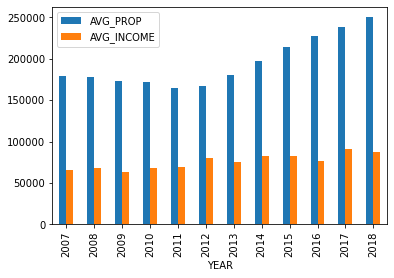

In [149]:
#Building all-time AVG_INCOME VS AVG_PROP data frames groupby ZIPCODE as all_time_IVP_zip_df
all_time_IVP_zip_df = main_df.drop(["LATITUDE","LONGITUDE","OPPORTUNITY_RATIO"], axis=1)
all_time_IVP_zip_df = all_time_IVP_zip_df.groupby("YEAR").mean()
#all_time_IVP_zip_df.head
#all_time_IVP_zip_df.dtypes

all_time_IVP_zip_df.plot.bar()


KeyError: 'ZIPCODE'